## Rule Based Approach which just returns Anomaly or Normal

Rules Implemented - 
1. Check for the string "sshd" (to detect if it was a sshd process or not).
2. Check for the string "authentication failure" (to detect if it was a Authentication Failure or not).
3. Check if the IP Address has previously been detected till Rule #2 (we do this by maintaining a Data Structure, i.e., list of lists where we store the IP Address, The Last Time it tried to access, and the number of times it has failed).
4. If Rule #3 turns out true, check if the last time the IP Address tried to access is within a window of 5s or not.
5. If Rule #4 turns out true, increase the number of times the IP Address has tried to access by 1 in the Data Structure.
6. If the number of times the IP Address has tried to access exceeds more than 5, consider that as an anomaly.

In [1]:
from datetime import datetime, timedelta

def process_log(log, ip_data):
    """
    Processes a single log entry and make decisions based on the decision tree.

    Arguments or Args:
        log (str): The log entry in string format.
        ip_data (list): List of lists containing IP data in the format:
                        [IP Address, Last Accessed DateTime, Incorrect Attempts].

    Returns:
        str: "Anomaly Detected" if an anomaly is found, else "Normal".
    """
    
    # Step 1: Checking if "sshd" is in the log
    if "sshd" not in log:
        return "Normal"

    # Step 2: Checking if "authentication failure" is in the log
    if "authentication failure" not in log:
        return "Normal"

    # Extracting the IP address and time from the log
    try:
        ip_address = log.split("rhost=")[1].split()[0]
        date_str = " ".join(log.split()[:3])
        log_time = datetime.strptime(date_str, "%b %d %H:%M:%S")
    except (IndexError, ValueError):
        return "Normal"  # To handle logs with missing or invalid data, just return Normal

    # Step 3: Checking if the IP address is in the list of lists
    for entry in ip_data:
        
        if entry[0] == ip_address:
            
            # Step 4: Checking if the time difference is within 5 seconds
            if abs((log_time - entry[1]).total_seconds()) <= 5:
                
                # Step 5: Increasing incorrect attempts
                entry[2] += 1
                
            else:
                
                # Updating the time and reset incorrect attempts
                entry[1] = log_time
                entry[2] = 1

            # Step 6: Checking if incorrect attempts exceed 5
            if entry[2] > 5:
                return "Anomaly Detected"
            return "Normal"

    # If IP address is not in the list, adding a new entry
    ip_data.append([ip_address, log_time, 1])
    return "Normal"

logs = [
    "Jun 14 15:16:01 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.4",
    "Jun 14 15:16:02 combo sshd(pam_unix)[19937]: check pass; user unknown",
    "Jun 14 15:16:02 combo sshd(pam_unix)[19937]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.4",
    "Jun 14 15:16:03 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.2",
    "Jun 14 15:16:04 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.2",
    "Jun 14 15:16:04 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.3",
    "Jun 14 15:16:04 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.3",
    "Jun 14 15:16:05 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.2",
    "Jun 14 15:16:05 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.2",
    "Jun 14 15:16:05 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.2",
    "Jun 14 15:16:05 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.2",
    "Jun 14 15:16:06 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.4",
    "Jun 14 15:16:06 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.2",
    "Jun 14 15:16:06 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.4",
    "Jun 14 15:16:06 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.4",
    "Jun 14 15:16:06 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.4",
    "Jun 14 15:16:06 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.4",
]

ip_data = []  # List of lists for storing IP data

for log in logs:
    result = process_log(log, ip_data)
    print(result)

print("Updated IP Data:", ip_data)


Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Anomaly Detected
Normal
Anomaly Detected
Normal
Normal
Anomaly Detected
Anomaly Detected
Updated IP Data: [['218.188.2.4', datetime.datetime(1900, 6, 14, 15, 16, 1), 7], ['218.188.2.2', datetime.datetime(1900, 6, 14, 15, 16, 3), 7], ['218.188.2.3', datetime.datetime(1900, 6, 14, 15, 16, 4), 2]]


## Rule Based Approach which returns Anomaly or Normal alogn with IP Addresses

Rules Implemented - 
1. Check for the string "sshd" (to detect if it was a sshd process or not).
2. Check for the string "authentication failure" (to detect if it was a Authentication Failure or not).
3. Check if the IP Address has previously been detected till Rule #2 (we do this by maintaining a Data Structure, i.e., list of lists where we store the IP Address, The Last Time it tried to access, and the number of times it has failed).
4. If Rule #3 turns out true, check if the last time the IP Address tried to access is within a window of 5s or not.
5. If Rule #4 turns out true, increase the number of times the IP Address has tried to access by 1 in the Data Structure.
6. If the number of times the IP Address has tried to access exceeds more than 5, consider that as an anomaly.

In [2]:
from datetime import datetime, timedelta

def process_log(log, ip_data):
    """
    Process a single log entry and make decisions based on the decision tree proposed by Indrajit.

    Arguments or Args:
        log (str): The log entry in string format.
        ip_data (list): List of lists containing IP data in the format:
                        [IP Address, Last Accessed DateTime, Incorrect Attempts].

    Returns:
        tuple: (str, str) - Status ("Anomaly Detected" or "Normal") and the IP address.
    """
    # Step 1: Checking if "sshd" is in the log
    if "sshd" not in log:
        return "Normal", None

    # Step 2: Checking if "authentication failure" is in the log
    if "authentication failure" not in log:
        return "Normal", None

    # Extracting the IP address and time from the log
    try:
        ip_address = log.split("rhost=")[1].split()[0]
        
        date_str = " ".join(log.split()[:3])
        
        log_time = datetime.strptime(date_str, "%b %d %H:%M:%S")
        
    except (IndexError, ValueError):
        return "Normal", None  # To handle logs with missing or invalid data, just return Normal for now

    # Step 3: Checking if the IP address is in the list of lists
    for entry in ip_data:
        
        if entry[0] == ip_address:
            
            # Step 4: Checking if the time difference is within 5 seconds
            if abs((log_time - entry[1]).total_seconds()) <= 5:
                
                # Step 5: Increasing incorrect attempts
                entry[2] += 1
                
            else:
                
                # Updating the time and reset incorrect attempts
                entry[1] = log_time
                entry[2] = 1

            # Step 6: Checing if incorrect attempts exceed 5
            if entry[2] > 5:
                return "Anomaly Detected", ip_address
            return "Normal", ip_address

    # If IP address is not in the list, adding a new entry in the ip_data
    ip_data.append([ip_address, log_time, 1])
    return "Normal", ip_address

logs = [
    # "Jun 14 15:16:01 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.4",
    "Jun 14 15:16:02 combo sshd(pam_unix)[19937]: check pass; user unknown",
    "Jun 14 15:16:02 combo sshd(pam_unix)[19937]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.4",
    "Jun 14 15:16:03 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.2",
    "Jun 14 15:16:04 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.2",
    "Jun 14 15:16:04 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.3",
    "Jun 14 15:16:04 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.3",
    "Jun 14 15:16:05 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.2",
    "Jun 14 15:16:05 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.2",
    "Jun 14 15:16:05 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.2",
    "Jun 14 15:16:05 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.2",
    "Jun 14 15:16:06 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.4",
    "Jun 14 15:16:06 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.2",
    "Jun 14 15:16:06 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.4",
    "Jun 14 15:16:06 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.4",
    "Jun 14 15:16:06 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.4",
    "Jun 14 15:16:06 combo sshd(pam_unix)[19939]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.4",
]

ip_data = []  # List of lists for storing IP data

for log in logs:
    result, ip = process_log(log, ip_data)
    print(f"Status: {result}, IP: {ip}")

print("Updated IP Data:", ip_data)

Status: Normal, IP: 218.188.2.4
Status: Normal, IP: None
Status: Normal, IP: 218.188.2.4
Status: Normal, IP: 218.188.2.2
Status: Normal, IP: 218.188.2.2
Status: Normal, IP: 218.188.2.3
Status: Normal, IP: 218.188.2.3
Status: Normal, IP: 218.188.2.2
Status: Normal, IP: 218.188.2.2
Status: Normal, IP: 218.188.2.2
Status: Anomaly Detected, IP: 218.188.2.2
Status: Normal, IP: 218.188.2.4
Status: Anomaly Detected, IP: 218.188.2.2
Status: Normal, IP: 218.188.2.4
Status: Normal, IP: 218.188.2.4
Status: Anomaly Detected, IP: 218.188.2.4
Status: Anomaly Detected, IP: 218.188.2.4
Updated IP Data: [['218.188.2.4', datetime.datetime(1900, 6, 14, 15, 16, 1), 7], ['218.188.2.2', datetime.datetime(1900, 6, 14, 15, 16, 3), 7], ['218.188.2.3', datetime.datetime(1900, 6, 14, 15, 16, 4), 2]]


### Creating the dataset with only 2 columns

Rules Implemented - 
1. Check for the string "sshd" (to detect if it was a sshd process or not).
2. Check for the string "authentication failure" (to detect if it was a Authentication Failure or not).
3. Check if the IP Address has previously been detected till Rule #2 (we do this by maintaining a Data Structure, i.e., list of lists where we store the IP Address, The Last Time it tried to access, and the number of times it has failed).
4. If Rule #3 turns out true, check if the last time the IP Address tried to access is within a window of 10s or not.
5. If Rule #4 turns out true, increase the number of times the IP Address has tried to access by 1 in the Data Structure.
6. If the number of times the IP Address has tried to access exceeds more than 3, consider that as an anomaly.

Now, we are trying to create a dataset of 2 columns, i.e., "logs" (which stores the whole log) and "anomaly detected" (yes/no column, which stores whether that log is an anomaly or not)

In [3]:
import csv
from datetime import datetime, timedelta

def process_log_and_classify(log, ip_data):
    """
    Processes a single log entry and classify it as an anomaly or normal based on the criteria.

    Args:
        log (str): The log entry in string format.
        ip_data (list): List of lists containing IP data in the format:
                        [IP Address, Last Accessed DateTime, Total Incorrect Attempts].

    Returns:
        tuple: (str, str) - The log entry and its classification ("Yes" for anomaly detected, "No" for normal).
    """
    # Step 1: Checking if "sshd" is in the log
    if "sshd" not in log:
        return log, "No"

    # Step 2: Checking if "authentication failure" is in the log
    if "authentication failure" not in log:
        return log, "No"

    # Extracting the IP address and datetime from the log
    try:
        ip_address = log.split("rhost=")[1].split()[0]
        date_str = " ".join(log.split()[:3])
        log_time = datetime.strptime(date_str, "%b %d %H:%M:%S")
    except (IndexError, ValueError):
        return log, "No"  # Handle logs with missing or invalid data

    # Step 3: Checking if the IP address is in the list of lists
    for entry in ip_data:
        if entry[0] == ip_address:
            # Step 4: Checking if the time difference is within 10 seconds
            if abs((log_time - entry[1]).total_seconds()) <= 10:
                # Step 5: Increasing incorrect attempts
                entry[2] += 1
            else:
                # Updating the time and reset incorrect attempts
                entry[1] = log_time
                entry[2] = 1

            # Step 6: Checking if incorrect attempts exceed 3
            if entry[2] > 3:
                return log, "Yes"
            return log, "No"

    # If IP address is not in the list, add a new entry
    ip_data.append([ip_address, log_time, 1])
    return log, "No"

def create_dataset_from_logs(log_file_path, output_csv_path):
    """
    Processes logs from a file, classifies them as anomaly or not, and save the results to a CSV.

    Args:
        log_file_path (str): Path to the input .log file.
        output_csv_path (str): Path to the output CSV file.
    """
    ip_data = []  # List of lists for storing IP data
    dataset = []

    # Logs from the file
    with open(log_file_path, 'r') as file:
        logs = file.readlines()

    # Processes each log entry
    for log in logs:
        result = process_log_and_classify(log.strip(), ip_data)
        dataset.append(result)

    # Writes the dataset to a CSV file
    with open(output_csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["Logs", "Anomaly Detected"])
        writer.writerows(dataset)

    print(f"Dataset saved to {output_csv_path}")

log_file_path = "./datasets/linux/Linux_2k.log"
output_csv_path = "classified_logs2.csv"
create_dataset_from_logs(log_file_path, output_csv_path)


Dataset saved to classified_logs2.csv


                                                   Logs Anomaly Detected
0     Jun 14 15:16:01 combo sshd(pam_unix)[19939]: a...               No
1     Jun 14 15:16:02 combo sshd(pam_unix)[19937]: c...               No
2     Jun 14 15:16:02 combo sshd(pam_unix)[19937]: a...               No
3     Jun 15 02:04:59 combo sshd(pam_unix)[20882]: a...               No
4     Jun 15 02:04:59 combo sshd(pam_unix)[20884]: a...               No
...                                                 ...              ...
1995  Jul 27 14:41:59 combo kernel: pci_hotplug: PCI...               No
1996  Jul 27 14:42:00 combo kernel: isapnp: Scanning...               No
1997  Jul 27 14:42:00 combo kernel: isapnp: No Plug ...               No
1998  Jul 27 14:42:00 combo kernel: Real Time Clock ...               No
1999  Jul 27 14:42:00 combo kernel: Linux agpgart in...               No

[2000 rows x 2 columns]


(array([1720.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         280.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

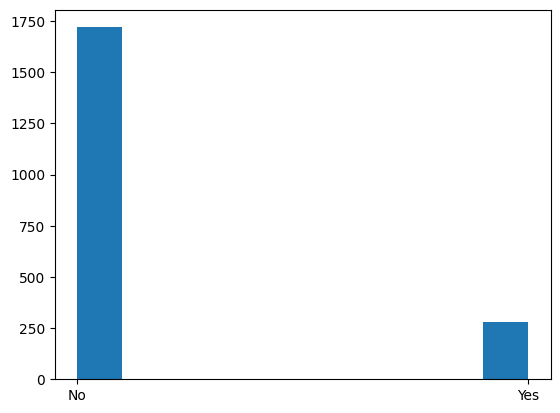

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('classified_logs2.csv')
print(df)
plt.hist(df['Anomaly Detected'])

### Creating the dataset with 5 columns

Rules Implemented - 
1. Check for the string "sshd" (to detect if it was a sshd process or not).
2. Check for the string "authentication failure" (to detect if it was a Authentication Failure or not).
3. Check if the IP Address has previously been detected till Rule #2 (we do this by maintaining a Data Structure, i.e., list of lists where we store the IP Address, The Last Time it tried to access, and the number of times it has failed).
4. If Rule #3 turns out true, check if the last time the IP Address tried to access is within a window of 10s or not.
5. If Rule #4 turns out true, increase the number of times the IP Address has tried to access by 1 in the Data Structure.
6. If the number of times the IP Address has tried to access exceeds more than 3, consider that as an anomaly.

Now, we are trying to create a dataset of 5 columns, i.e., "logs" (which stores the whole log), "IP Address" (which stores the IP Address that tried to access the system), "Date" (which stores the date when the IP Address tried to access it), "Time" (which stores the time when the IP Addresses tried to access it) and "anomaly detected" (yes/no column, which stores whether that log is an anomaly or not)

In [5]:
import re
import csv
from datetime import datetime, timedelta

# Initializing the list of lists to track IPs and their details
ip_tracking = []

# Function to extract date and time from the log
def extract_datetime(log_line):
    match = re.search(r"^(\w{3} \d{1,2} \d{2}:\d{2}:\d{2})", log_line)
    if match:
        return match.group(1)
    return None

# Function to extract IP address from the log
def extract_ip(log_line):
    match = re.search(r"rhost=([\w\.-]+)", log_line)
    if match:
        return match.group(1)
    return None

# Function to check if a time is within 10 seconds of another time
def within_10_seconds(time1, time2):
    delta = abs(time1 - time2)
    return delta <= timedelta(seconds=10)

# Function to classify logs and generate the dataset
def classify_logs(input_log_file, output_csv_file):
    dataset = []

    with open(input_log_file, 'r') as file:
        logs = file.readlines()

    for log in logs:
        log = log.strip()
        anomaly_detected = "No"
        log_datetime_str = extract_datetime(log)
        log_datetime = datetime.strptime(log_datetime_str, "%b %d %H:%M:%S") if log_datetime_str else None
        ip_address = extract_ip(log)

        if "sshd" in log:
            if "authentication failure" in log:
                if ip_address:
                    found = False
                    for entry in ip_tracking:
                        if entry[0] == ip_address:
                            found = True
                            last_access_time = entry[1]
                            # Ensure both times are valid before comparison
                            if log_datetime and last_access_time and within_10_seconds(log_datetime, last_access_time):
                                entry[2] += 1
                                # Checking if the occurrence is greater than 3 times
                                if entry[2] > 3:
                                    anomaly_detected = "Yes"
                            else:
                                entry[1] = log_datetime
                                entry[2] = 1
                            break

                    if not found:
                        ip_tracking.append([ip_address, log_datetime, 1])
                else:
                    anomaly_detected = "No"
        
        # Add the data to the dataset
        dataset.append({
            "Logs": log,
            "IP Address": ip_address if ip_address else None,
            "Date": log_datetime.strftime("%b %d") if log_datetime else None,
            "Time": log_datetime.strftime("%H:%M:%S") if log_datetime else None,
            "Anomaly Detected": anomaly_detected
        })

    # Write the dataset to a CSV file
    with open(output_csv_file, 'w', newline='') as csvfile:
        fieldnames = ["Logs", "IP Address", "Date", "Time", "Anomaly Detected"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(dataset)


# Example usage
input_log_file = "./datasets/linux/Linux_2k.log"
output_csv_file = "classified_logs3.csv"
classify_logs(input_log_file, output_csv_file)
print(f"Classification complete. Dataset saved to {output_csv_file}.")


Classification complete. Dataset saved to classified_logs3.csv.


                                                Logs  \
0  Jun 14 15:16:01 combo sshd(pam_unix)[19939]: a...   
1  Jun 14 15:16:02 combo sshd(pam_unix)[19937]: c...   
2  Jun 14 15:16:02 combo sshd(pam_unix)[19937]: a...   
3  Jun 15 02:04:59 combo sshd(pam_unix)[20882]: a...   
4  Jun 15 02:04:59 combo sshd(pam_unix)[20884]: a...   

                         IP Address    Date      Time Anomaly Detected  
0                       218.188.2.4  Jun 14  15:16:01               No  
1                               NaN  Jun 14  15:16:02               No  
2                       218.188.2.4  Jun 14  15:16:02               No  
3  220-135-151-1.hinet-ip.hinet.net  Jun 15  02:04:59               No  
4  220-135-151-1.hinet-ip.hinet.net  Jun 15  02:04:59               No  


(array([1761.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         239.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

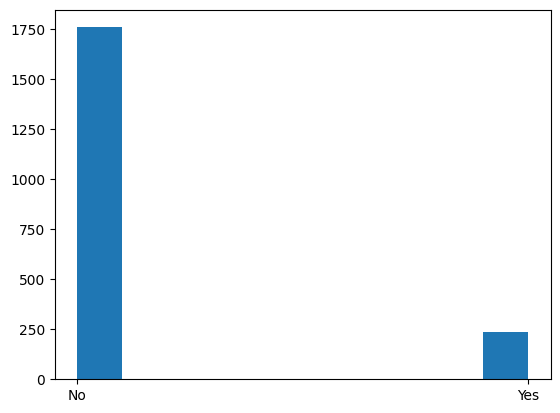

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('classified_logs3.csv')
print(df.head())
plt.hist(df['Anomaly Detected'])

### Trying out some enhancements

Rules Implemented - 
1. Check for the string "sshd" (to detect if it was a sshd process or not).
2. Check for the string "authentication failure" (to detect if it was a Authentication Failure or not).
3. Check if the IP Address has previously been detected till Rule #2 (we do this by maintaining a Data Structure, i.e., list of lists where we store the IP Address, The Last Time it tried to access, and the number of times it has failed).
4. If Rule #3 turns out true, check if the last time the IP Address tried to access is within a window of 10s or not.
5. If Rule #4 turns out true, increase the number of times the IP Address has tried to access by 1 in the Data Structure.
6. If the number of times the IP Address has tried to access exceeds more than 3, consider that as an anomaly.
7. Check if the same number of IP Address has tried to access and failed for more than 20 times in a 24h window.
8. Check if someone successfully logged in after a series of incorrect attempts.
9. Check if various IP Addresses are trying to access and fail within a 5s window.
10. Check if the system stopped abruptly by checking for the strings "ALERT" and "exited abnormally".

Now, we are trying to create a dataset of 5 columns, i.e., "logs" (which stores the whole log), "IP Address" (which stores the IP Address that tried to access the system), "Date" (which stores the date when the IP Address tried to access it), "Time" (which stores the time when the IP Addresses tried to access it) and "anomaly detected" (yes/no column, which stores whether that log is an anomaly or not)

In [16]:
import re
import csv
from datetime import datetime, timedelta

# Initializing tracking structures
ip_tracking = []
failed_attempts_over_time = {}
access_attempts = []

# Function to extract date and time from the log
def extract_datetime(log_line):
    match = re.search(r"^(\w{3} \d{1,2} \d{2}:\d{2}:\d{2})", log_line)
    if match:
        return match.group(1)
    return None

# Function to extract IP address from the log
def extract_ip(log_line):
    match = re.search(r"rhost=([\w\.-]+)", log_line)
    if match:
        return match.group(1)
    return None

# Function to check if a time is within 10 seconds of another time
def within_10_seconds(time1, time2):
    if time1 is None or time2 is None:
        return False
    delta = abs(time1 - time2)
    return delta <= timedelta(seconds=10)

# Function to classify logs and generate the dataset
def classify_logs(input_log_file, output_csv_file):
    global access_attempts

    dataset = []

    with open(input_log_file, 'r') as file:
        logs = file.readlines()

    for log in logs:
        log = log.strip()
        anomaly_detected = "No"
        log_datetime_str = extract_datetime(log)
        log_datetime = datetime.strptime(log_datetime_str, "%b %d %H:%M:%S") if log_datetime_str else None
        ip_address = extract_ip(log)
        log_type = "Normal"

        if "sshd" in log:
            if "authentication failure" in log:
                log_type = "Auth Failure"
                if ip_address and log_datetime:
                    found = False
                    for entry in ip_tracking:
                        if entry[0] == ip_address:
                            found = True
                            last_access_time = entry[1]
                            if within_10_seconds(log_datetime, last_access_time):
                                entry[2] += 1
                                if entry[2] > 3:
                                    anomaly_detected = "Yes"
                            else:
                                entry[1] = log_datetime
                                entry[2] = 1
                            break
                    if not found:
                        ip_tracking.append([ip_address, log_datetime, 1])
                
                # Track failed attempts over time
                if ip_address and log_datetime:
                    if ip_address not in failed_attempts_over_time:
                        failed_attempts_over_time[ip_address] = []
                    failed_attempts_over_time[ip_address].append(log_datetime)
                    # Remove entries older than 24 hours
                    failed_attempts_over_time[ip_address] = [t for t in failed_attempts_over_time[ip_address] if (log_datetime - t).total_seconds() <= 86400]
                    if len(failed_attempts_over_time[ip_address]) > 20:
                        anomaly_detected = "Yes"
            
            elif "Accepted password" in log:
                log_type = "Successful Login"
                if ip_address and ip_address in failed_attempts_over_time and len(failed_attempts_over_time[ip_address]) > 3:
                    anomaly_detected = "Yes"
                    del failed_attempts_over_time[ip_address]

        # Check for simultaneous access attempts
        if ip_address and log_datetime:
            access_attempts.append((ip_address, log_datetime))
            # Keep only entries within the last 5 seconds
            access_attempts = [(ip, t) for ip, t in access_attempts if (log_datetime - t).total_seconds() <= 5]
            unique_ips = {ip for ip, _ in access_attempts if ip is not None}
            if len(unique_ips) > 5:
                anomaly_detected = "Yes"
        
        # Anomalous Service Behavior
        if any(keyword in log for keyword in ["ALERT", "exited abnormally"]):
            log_type = "Service Issue"
            anomaly_detected = "Yes"

        dataset.append({
            "Logs": log,
            "IP Address": ip_address if ip_address else None,
            "Date": log_datetime.strftime("%b %d") if log_datetime else None,
            "Time": log_datetime.strftime("%H:%M:%S") if log_datetime else None,
            "Log Type": log_type,
            "Anomaly Detected": anomaly_detected
        })

    # Write the dataset to a CSV file
    with open(output_csv_file, 'w', newline='') as csvfile:
        fieldnames = ["Logs", "IP Address", "Date", "Time", "Log Type", "Anomaly Detected"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(dataset)

# Example usage
input_log_file = "./datasets/linux/Linux_2k.log"
output_csv_file = "classified_logs4.csv"
classify_logs(input_log_file, output_csv_file)
# print(f"Classification complete. Dataset saved to {output_csv_file}.")

Classification complete. Dataset saved to classified_logs4.csv.


                                                Logs  \
0  Jun 14 15:16:01 combo sshd(pam_unix)[19939]: a...   
1  Jun 14 15:16:02 combo sshd(pam_unix)[19937]: c...   
2  Jun 14 15:16:02 combo sshd(pam_unix)[19937]: a...   
3  Jun 15 02:04:59 combo sshd(pam_unix)[20882]: a...   
4  Jun 15 02:04:59 combo sshd(pam_unix)[20884]: a...   

                         IP Address    Date      Time      Log Type  \
0                       218.188.2.4  Jun 14  15:16:01  Auth Failure   
1                               NaN  Jun 14  15:16:02        Normal   
2                       218.188.2.4  Jun 14  15:16:02  Auth Failure   
3  220-135-151-1.hinet-ip.hinet.net  Jun 15  02:04:59  Auth Failure   
4  220-135-151-1.hinet-ip.hinet.net  Jun 15  02:04:59  Auth Failure   

  Anomaly Detected  
0               No  
1               No  
2               No  
3               No  
4               No  


(array([1697.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         303.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

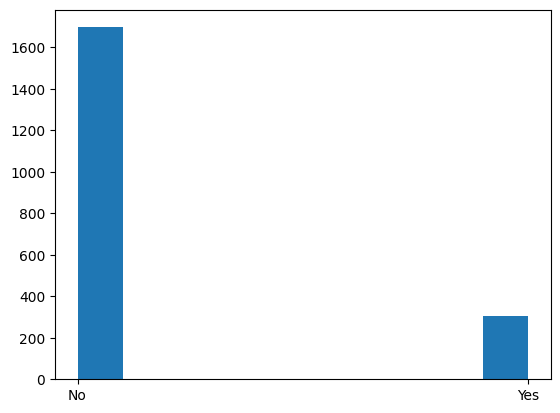

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
# 
df = pd.read_csv('classified_logs4.csv')
print(df.head())
plt.hist(df['Anomaly Detected'])

## Some Enhancements

Now, I am adding a few more columns in the dataset for good model training. Some additional rows like 
auth_failures_last_1h: Number of authentication failures from the same IP in the last hour.

time_since_last_failure: Seconds since the last failure from this IP.

is_root_attempt: 1 if the user is root, else 0.

unique_users_attempted: Number of distinct users targeted by the IP.

In [6]:
import re
import csv
from datetime import datetime, timedelta

# Tracking structures
ip_tracking = []
failed_attempts_over_time = {}
access_attempts = []
ip_user_map = {}  # For tracking unique users per IP
last_failure_time = {}  # For time since last failure

def extract_datetime(log_line):
    match = re.search(r"^(\w{3} \d{1,2} \d{2}:\d{2}:\d{2})", log_line)
    if match:
        return match.group(1)
    return None

def extract_ip(log_line):
    match = re.search(r"rhost=([\w\.-]+)", log_line)
    if match:
        return match.group(1)
    return None

def extract_user(log_line):
    match = re.search(r"user=([\w\.-]+)", log_line)
    if match:
        return match.group(1)
    return None

def within_10_seconds(time1, time2):
    if time1 is None or time2 is None:
        return False
    delta = abs(time1 - time2)
    return delta <= timedelta(seconds=10)

def classify_logs(input_log_file, output_csv_file):
    global access_attempts

    dataset = []

    with open(input_log_file, 'r') as file:
        logs = file.readlines()

    for log in logs:
        log = log.strip()
        anomaly_detected = "No"
        log_datetime_str = extract_datetime(log)
        log_datetime = datetime.strptime(log_datetime_str, "%b %d %H:%M:%S") if log_datetime_str else None
        ip_address = extract_ip(log)
        user = extract_user(log)
        log_type = "Normal"

        # Default feature values
        auth_failures_last_1h = 0
        time_since_last_failure = None
        is_root_attempt = 1 if user == "root" else 0
        unique_users_attempted = 0

        if "sshd" in log:
            if "authentication failure" in log:
                log_type = "Auth Failure"
                if ip_address and log_datetime:
                    # Brute force detection
                    found = False
                    for entry in ip_tracking:
                        if entry[0] == ip_address:
                            found = True
                            last_access_time = entry[1]
                            if within_10_seconds(log_datetime, last_access_time):
                                entry[2] += 1
                                if entry[2] > 3:
                                    anomaly_detected = "Yes"
                            else:
                                entry[1] = log_datetime
                                entry[2] = 1
                            break
                    if not found:
                        ip_tracking.append([ip_address, log_datetime, 1])

                    # Count failures in the last 1 hour
                    if ip_address not in failed_attempts_over_time:
                        failed_attempts_over_time[ip_address] = []
                    failed_attempts_over_time[ip_address].append(log_datetime)
                    failed_attempts_over_time[ip_address] = [
                        t for t in failed_attempts_over_time[ip_address]
                        if (log_datetime - t).total_seconds() <= 3600
                    ]
                    auth_failures_last_1h = len(failed_attempts_over_time[ip_address])
                    if auth_failures_last_1h > 20:
                        anomaly_detected = "Yes"

                    # Time since last failure
                    if ip_address in last_failure_time:
                        time_since_last_failure = (log_datetime - last_failure_time[ip_address]).total_seconds()
                    last_failure_time[ip_address] = log_datetime

                    # Track unique users attempted by this IP
                    if ip_address not in ip_user_map:
                        ip_user_map[ip_address] = set()
                    if user:
                        ip_user_map[ip_address].add(user)
                    unique_users_attempted = len(ip_user_map[ip_address])
            
            elif "Accepted password" in log:
                log_type = "Successful Login"
                if ip_address and ip_address in failed_attempts_over_time and len(failed_attempts_over_time[ip_address]) > 3:
                    anomaly_detected = "Yes"
                    del failed_attempts_over_time[ip_address]

        # Simultaneous access detection
        if ip_address and log_datetime:
            access_attempts.append((ip_address, log_datetime))
            access_attempts = [(ip, t) for ip, t in access_attempts if (log_datetime - t).total_seconds() <= 5]
            unique_ips = {ip for ip, _ in access_attempts if ip is not None}
            if len(unique_ips) > 5:
                anomaly_detected = "Yes"

        # Anomalous Service Behavior
        if any(keyword in log for keyword in ["ALERT", "exited abnormally"]):
            log_type = "Service Issue"
            anomaly_detected = "Yes"

        dataset.append({
            "logs": log,
            "ip_address": ip_address if ip_address else None,
            "date": log_datetime.strftime("%b %d") if log_datetime else None,
            "time": log_datetime.strftime("%H:%M:%S") if log_datetime else None,
            "log_type": log_type,
            "auth_failures_last_1h": auth_failures_last_1h,
            "time_since_last_failure": round(time_since_last_failure, 2) if time_since_last_failure is not None else None,
            "is_root_attempt": is_root_attempt,
            "unique_users_attempted": unique_users_attempted,
            "anomaly_detected": anomaly_detected,
        })

    # Write the dataset to a CSV file
    with open(output_csv_file, 'w', newline='') as csvfile:
        fieldnames = [
            "logs", "ip_address", "date", "time", "log_type", "auth_failures_last_1h", "time_since_last_failure", "is_root_attempt", "unique_users_attempted", "anomaly_detected"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(dataset)

# Example usage
input_log_file = "./datasets/linux/Linux_2k.log"
output_csv_file = "classified_logs5.csv"
classify_logs(input_log_file, output_csv_file)
print(f"Classification complete. Dataset saved to {output_csv_file}.")


Classification complete. Dataset saved to classified_logs5.csv.


                                                logs  \
0  Jun 14 15:16:01 combo sshd(pam_unix)[19939]: a...   
1  Jun 14 15:16:02 combo sshd(pam_unix)[19937]: c...   
2  Jun 14 15:16:02 combo sshd(pam_unix)[19937]: a...   
3  Jun 15 02:04:59 combo sshd(pam_unix)[20882]: a...   
4  Jun 15 02:04:59 combo sshd(pam_unix)[20884]: a...   

                         ip_address    date      time      log_type  \
0                       218.188.2.4  Jun 14  15:16:01  Auth Failure   
1                               NaN  Jun 14  15:16:02        Normal   
2                       218.188.2.4  Jun 14  15:16:02  Auth Failure   
3  220-135-151-1.hinet-ip.hinet.net  Jun 15  02:04:59  Auth Failure   
4  220-135-151-1.hinet-ip.hinet.net  Jun 15  02:04:59  Auth Failure   

   auth_failures_last_1h  time_since_last_failure  is_root_attempt  \
0                      1                      NaN                0   
1                      0                      NaN                0   
2                      2  

(array([1697.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         303.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

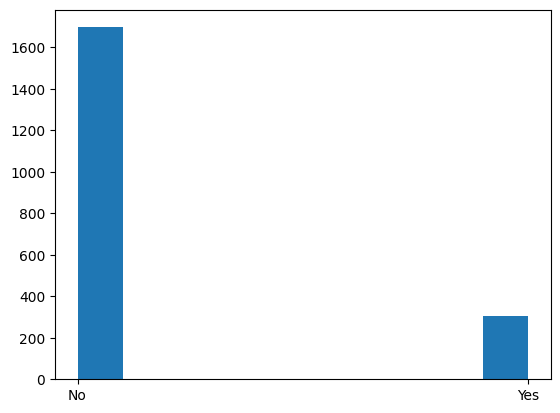

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
# 
df = pd.read_csv('classified_logs5.csv')
print(df.head())
plt.hist(df['anomaly_detected'])